In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# step 1 : Load data
df = pd.read_csv("Unemployment in India.csv")

In [95]:
# step 2 : Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')


In [96]:
# step 3 : Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


C:\Users\ujwal\AppData\Local\Temp\ipykernel_27488\2872543790.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [97]:
# step 4 : Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Region                                     28
Date                                       28
Frequency                                  28
Estimated_Unemployment_Rate_(%)            28
Estimated_Employed                         28
Estimated_Labour_Participation_Rate_(%)    28
Area                                       28
dtype: int64


In [99]:
# step 5 : Drop rows with missing important data
df.dropna(subset=['Date', 'Estimated_Unemployment_Rate_(%)'], inplace=True)


In [100]:
# step 6 : Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()


In [102]:
# step 7 : Summary statistics
print("\nSummary of Unemployment Rate:")
print(df['Estimated_Unemployment_Rate_(%)'].describe())



Summary of Unemployment Rate:
count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated_Unemployment_Rate_(%), dtype: float64


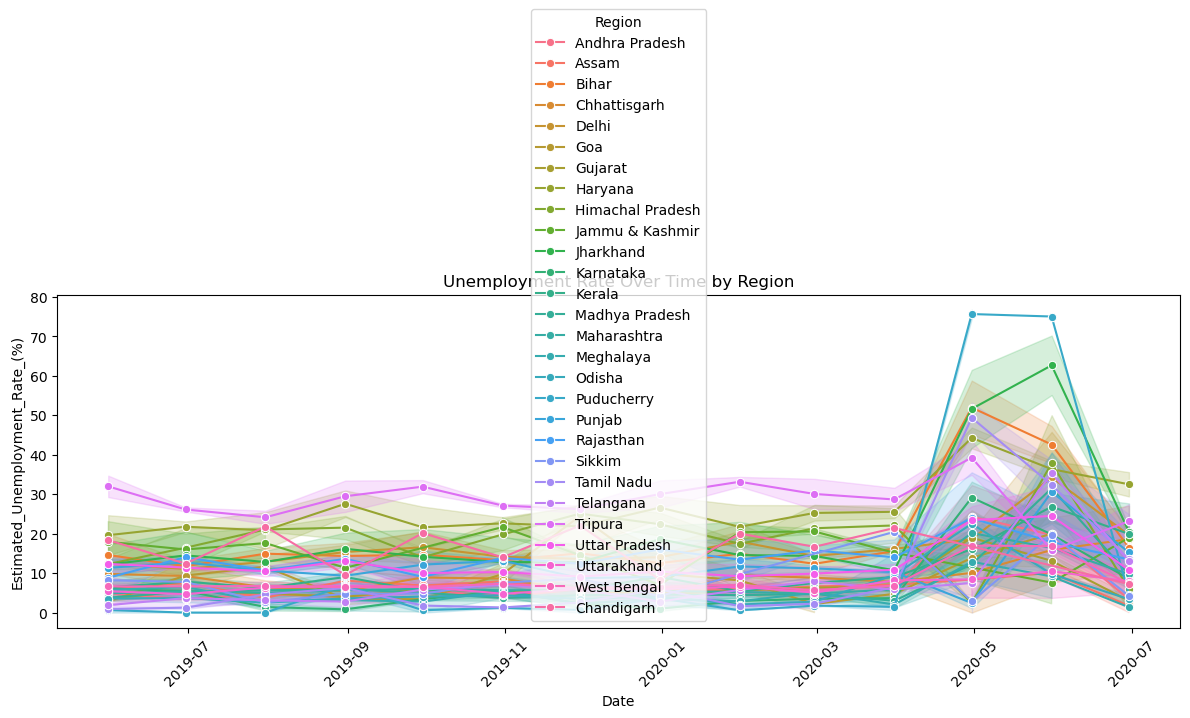

In [104]:
# step 8 : import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated_Unemployment_Rate_(%)', hue='Region', marker='o')
plt.title('Unemployment Rate Over Time by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


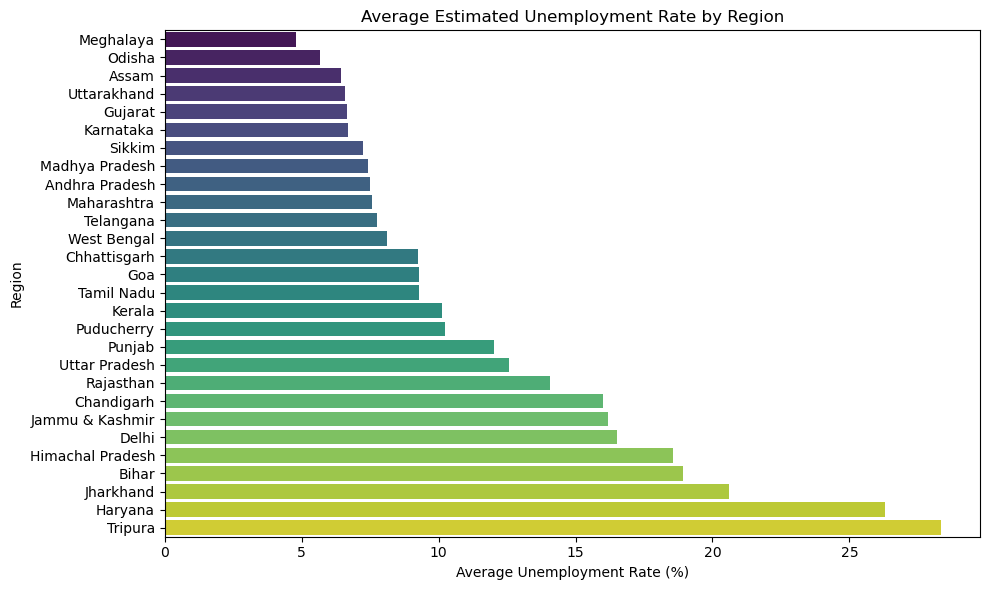

In [105]:
# step 9 :  Average Unemployment Rate by Region
region_avg = df.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=region_avg.values,
    y=region_avg.index,
    hue=region_avg.index,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Average Estimated Unemployment Rate by Region')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


C:\Users\ujwal\AppData\Local\Temp\ipykernel_27488\2472797096.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), errors='coerce')


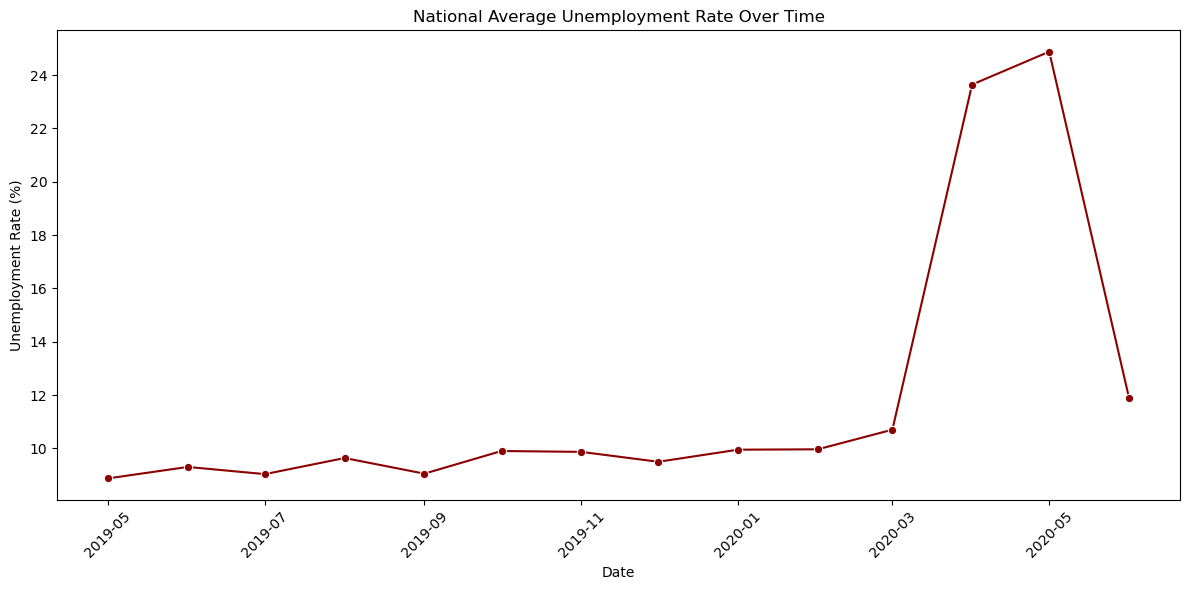

In [106]:
# Strip column names (if not already done earlier)
df.columns = df.columns.str.strip()

# Convert 'Month' and 'Year' to a datetime object for proper time series plotting
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), errors='coerce')

# Drop rows with invalid dates if any
df = df.dropna(subset=['Date'])

# Group by Date and calculate average unemployment rate across all regions
monthly_avg = df.groupby('Date')['Estimated_Unemployment_Rate_(%)'].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='darkred')
plt.title('National Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ujwal\AppData\Local\Temp\ipykernel_27488\4074712506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df, palette='Set2')


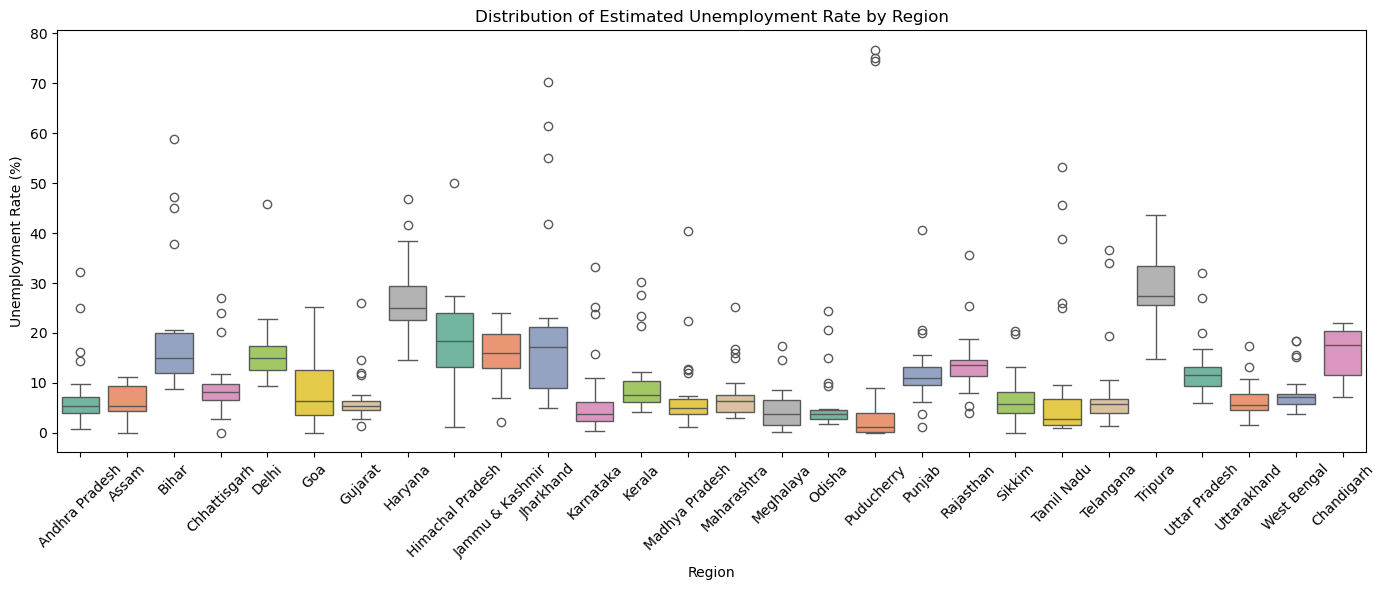

In [108]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()


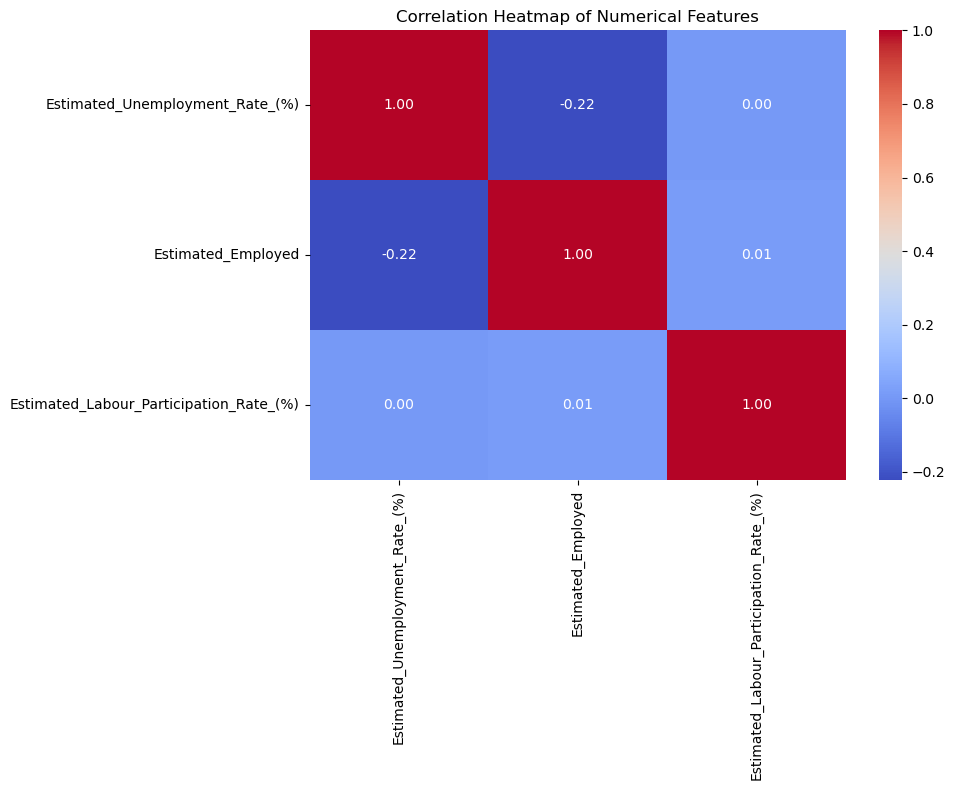

In [116]:
# Select numerical columns for correlation
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()
